In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
print("training set dimension: {}, test set dimension: {}"
      .format(X_train_full.shape, X_test.shape))

training set dimension: (60000, 28, 28), test set dimension: (10000, 28, 28)


In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

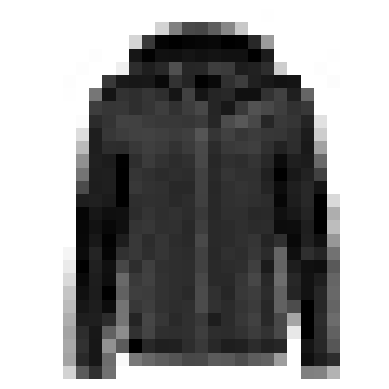

In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

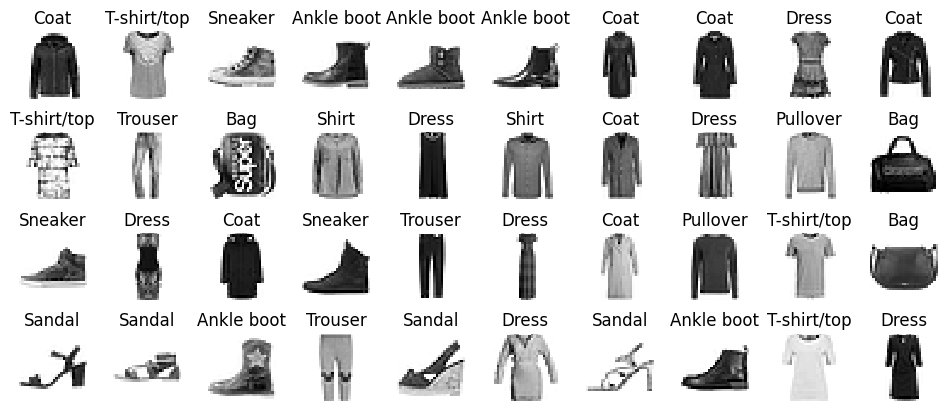

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.layers

/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-13 16:26:18.669610: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-05-13 16:26:18.669632: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-05-13 16:26:18.669638: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-05-13 16:26:18.669653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-13 16:26:18.669666: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow devi

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [10]:
weights, biases = hidden1.get_weights()

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
   1/1719 ━━━━━━━━━━━━━━━━━━━━ 5:50 204ms/step - accuracy: 0.2500 - loss: 2.3067

2025-05-13 16:26:19.031268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6657 - loss: 0.9676 - val_accuracy: 0.7950 - val_loss: 0.5716
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8169 - loss: 0.5250 - val_accuracy: 0.8314 - val_loss: 0.4796
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8314 - loss: 0.4818 - val_accuracy: 0.8432 - val_loss: 0.4559
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8390 - loss: 0.4592 - val_accuracy: 0.8488 - val_loss: 0.4497
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8456 - loss: 0.4427 - val_accuracy: 0.8500 - val_loss: 0.4358
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8479 - loss: 0.4398 - val_accuracy: 0.8540 - val_loss: 0.4339
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8481 - loss: 0.4328 - val_accuracy: 0.8510 - val_loss: 0.4406
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8501 - loss: 0.4314 - val_accurac

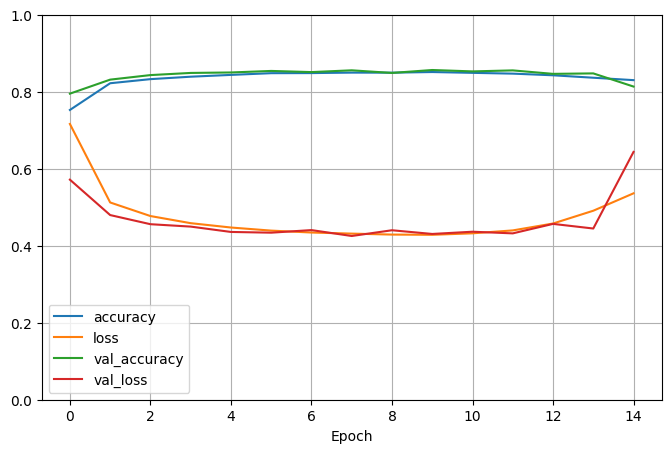

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch")
plt.legend(loc="lower left")  # extra code
plt.show()